<h1 align = "center"> Deep Learning Project </h1>

### Defining the problem and assembling a dataset

#### Input Data Description:

We will be using the fashion_mnist dataset which is a part of tensor flow datasets. The dataset has around 70,000 images that are grey-scale and 70,000 labels that describe each image. 60,000 images and labels are used for training purposes and 10,000 images and labels are to be used for testing purposes.

##### Images:
Images are gray-scale images with 28 * 28 pixels resolution. Each pixel falls in a range from 0-255 and is an integer.

##### Labels:
There are 10 total labels from which a single one defines a images. All the labels as mentioned on the dataset github documentation on the following link https://github.com/zalandoresearch/fashion-mnist are:
Labels
Each training and test example is assigned to one of the following labels:
   

|Label	| Description |
| :----:| :----:      |
|0	    | T-shirt/top |
|1	    | Trouser |
|2	    | Pullover |
|3	    | Dress |
|4	    | Coat |
|5	    | Sandal |
|6	    | Shirt |
|7	    | Sneaker |
|8	    | Bag |
|9	    | Ankle boot |



##### Example of a images and label:
The dataset consists of fashion related stuff so it has images and appropriate label. An image can have a single label from any of the 10 labels so the images and labels have a one-to-one correspondence. Labels in this dataset are e.g the image of a trouser has a label trouser. 

The dataset has:
Download size of 29.45 MiB
Dataset size: 36.42 MiB

As mentioned on its official documentation. To  know futher about the dataset visit the link: https://www.tensorflow.org/datasets/catalog/fashion_mnist


##### Problems:
This is a multi-class classification,single label problem which a type of supervised-learning. There are grey-scale images of fashion and clothing related products that can have a single label from 10 possible labels(classes) which are alos fashion related. The problem is to select the most appropriate label for an unseen image. This is a kind of stationary problem as a products categories does not change over time e.g if there is an image of a shirt it will have the class: T-Shirt which won't change over time, or over any other pattern.
We've around 60,000 images and labels for training and 10,000 images and labels for testing purposes. It's considerabely good amount of data. 

##### Goals of the Project:
<ul>
<li>The goal of the project is to create a model that has great accuracy in identifying labels for unseen images. So e.g the model is preprared and an multiple unseen images are given, it should have a high accuracy in identifying which class each image belongs to.
</li>
<li>
To train the model we will feed in the training data that has 60,000 images and training labels that are also 60,000. Based on this we will train create and train this model. Next we will test the model on the unseen 10,000 images from the testing data. This way we will make sure how our model performs on unseen data.
</li>
<li>Once we get predicted labels from our model we will match them in an appropriate way with the testing labels to see how has our model performed on unseen data. If the parameter that we have set to check how our model has performaed is low we can update the model to make some changes in order to improve the model and get better results.</li>

</ul>


### Choosing a measure of success

Since the problem we are dealing here is multi-class single label classification we can consider using accuracy or precision and recall as the measure of success. We can only deciding it by finding out if all the samples in our data are distrbuted equally among all the class. If there the class are equally distributed we will be choosing accuracy as our measure of succes, if classes are imbalanced we will be choosing precision and recall. Let's check how the samples in the dataset are distributed.

<div class="alert alert-block alert-info">
First lets import the dataset to our notebook. The dataset is present in tensor flow datasets importing it is very simple. 
Next the dataset will return four numpy lists for trainng images, training labels, testing images, testing labels. We have to store them properly
</div>

In [26]:
#The code below is taken from course content and adapted for my own use

#Importing the dataset from tensorflow datasets to use for multi class classification
from tensorflow.keras.datasets import fashion_mnist
#storing the data in separate variables for training images, training labels, testing images and testing labels 
(trainingImages, trainingLabels,), (testingImages, testingLabels) = fashion_mnist.load_data()

#The code ends here

<div class="alert alert-block alert-success">
The dataset is successfuly imported and stored in appropriate variables
</div

<div class="alert alert-block alert-info">
Next we need to  find out how many classes are in the dataset and how are they distributed. We'll be follwing a modular approach for it and create a function, so we don't need to write the entire code again if we need to again check classes in the upcoming sections
</div

In [27]:
#The code in below cells is originally written by me

In [28]:
#importing the numpy library
import numpy as np

def getClassDistrbituion(data, trainingLabels):
    '''
    Finds out and prints how classes are distributed over a dataset
    
    parameters: 
    
    data: It is the labels for the training or the testing part of a datasets
    
    trainingLabels: If true means the it is part of training labels, if false means it is part of testing labels
    
    output: prints how classes are distributed over the data
    
    '''
    
    #Based on the boolean value of the parameter set the value of a variable that will be used in printing statements
    if trainingLabels:
        dataSplit = 'Training'
    elif trainingLabels == False:
        dataSplit = 'Testing'
        
    #get total number of unique classes in data
    totTrainClasses = len(np.unique(data))


    #print total number of unique classes in data
    print("\033[1;36m \nTotal number of classes in {} data are: {}".format(dataSplit,totTrainClasses))


    #Get tot instances of each unique label in data
    uniqueLabels, count = np.unique(data, return_counts=True)

    #store the unique label and its instances as key-value pairs in a dictionary
    labelInstances = dict(zip(uniqueLabels, count))

    print("\033[1;31m\n Each class has instances:") 

    # loop over the dictionary 
    for uniqueLabels, count in labelInstances.items():
        #print label and its total count
        print("\033[1;31m {} : {}".format(uniqueLabels, count))

<div class="alert alert-block alert-info">
The function is created, lets run it in next cell to see our output</div 

In [29]:
#function call to check and display how classes are distributed over training labels
getClassDistrbituion(trainingLabels, trainingLabels = True)
#function call to check and display how classes are distributed over testing labels
getClassDistrbituion(testingLabels, trainingLabels = False)

 
Total number of classes in Training data are: 10

 Each class has instances:
 0 : 6000
 1 : 6000
 2 : 6000
 3 : 6000
 4 : 6000
 5 : 6000
 6 : 6000
 7 : 6000
 8 : 6000
 9 : 6000
 
Total number of classes in Testing data are: 10

 Each class has instances:
 0 : 1000
 1 : 1000
 2 : 1000
 3 : 1000
 4 : 1000
 5 : 1000
 6 : 1000
 7 : 1000
 8 : 1000
 9 : 1000


<div class="alert alert-block alert-success">
We have succesfuly printed the occurances of each class in both testing and training labels. We can see that all are classes are equally distributed and hence we decide the best metric as measure of success is <b>Accuracy</b>. We'll be aiming to develop a model and train it to achieve higher or good accuracy on unseen data
</div>

### Deciding on an evaluation protocol

The dataset has 60,000 images and labels for training and 10,000 images and labels for testing. The amount of data we have is quite good so we have flexibility in deciding to use a evaluation protocol between Hold-Out Validtaion and K-Fold Validation, or their startified versions.

First we evaluate our options: The first option we consider is hold-out cross validation which is setting aside a portion(usually 10-15%) of training data for validation. It is usually used for dataset which have good amount of data. And also the classes are balanced i.e they have almost equal or equally distributed data. It is quicker to perform. The statified version of hold-out validation is called the Stratified Hold Out Validation. This version is used when the classes do not have equal number of samples i.e they are imbalanced e.g class 0 has 300 samples while class 1 has 1000.

Another option to consider is the K-Fold Validation that is usually used when there is small amount of data in a dataset. It's more robust than hold-out validation but it is slow. It is mostly used for small dataset but it also produces good results on large dataset. In K-Fold Validation, the validation is done k times and the dataset is splitted into K splits called folds. During each k validation a different fold is set for validation while all other folds are used for input. The Stratified K-Fold Validation is used when there is a class imbalance in data. 

Considering the best options we have, i've chosen hold-out validation as the evaluation protocol. This was decided due to the fact that we have sufficient amount of data to perform hold-out validation and it is faster than K-Fold Validation. 

Though we have decided to use the gold out validation but we are yet to decide that should we use hold-out validation or the stratified version of it. We'll have to get some info on how sample are distributed in dataset in order to decide on the evaluation prtocol to be used.

<div class="alert alert-block alert-info">
We already created a function to show how classes are distributed on training or test data. Although we viewewd it in last section, let's view it again for clarity in this section just by calling the function
</div

In [30]:
#The code below is originally written by me

#function call to check and display how classes are distributed over training labels
getClassDistrbituion(trainingLabels, trainingLabels = True)
#function call to check and display how classes are distributed over testing labels
getClassDistrbituion(testingLabels, trainingLabels = False)

#The code originally written by me ends here

 
Total number of classes in Training data are: 10

 Each class has instances:
 0 : 6000
 1 : 6000
 2 : 6000
 3 : 6000
 4 : 6000
 5 : 6000
 6 : 6000
 7 : 6000
 8 : 6000
 9 : 6000
 
Total number of classes in Testing data are: 10

 Each class has instances:
 0 : 1000
 1 : 1000
 2 : 1000
 3 : 1000
 4 : 1000
 5 : 1000
 6 : 1000
 7 : 1000
 8 : 1000
 9 : 1000


In [31]:
#The code originally written by me ends here

<div class="alert alert-block alert-success">
As we can see from above output that there are euqal number fos samples of each class in training labels and testing labels so we can conclude that all the samples are equally divided among each class and there is no class imbalance. As a results the best approach to choose as the evaluation protocol is <b> Hold-Out Validation</b>
</div>

### Preparing your data

<div class="alert alert-block alert-info">
As part of pre-processing of the data before modelling begins we need to make sure of some things. So let's look at some properties of data. Once again we will be following a modular approach for the task
</div>

<div class="alert alert-block alert-info">
First lets check tha shape of the data and the data type. Next we will check the dimensionality of our data. Thirdly we will check the data types of our data
</div>

In [32]:
#The code in below cells is originally written by me

In [33]:
def getDataInfo(trainingImages, trainingLabels, testingImages, testingLabels):
    '''Function that prints data stats suchs as Shape, Data Type, Dimensionality
    parameters: trainingImages, trainingLabels, testingImages, testingLabels
    Output: Print statements to show Shape, Data Type, Dimensionality of data
    '''
    print("\033[1;34m Shapes of the data are following: ")
    #get and print shape of training and testing images
    print("\033[1;34m Training Images: {}".format(trainingImages.shape))
    print("\033[1;34m Testing Images: {}".format(testingImages.shape))
    #get and print shape of training and testing labels
    print("\033[1;34m Training Labels: {}".format(trainingLabels.shape))
    print("\033[1;34m Testing Labels: {}".format(testingLabels.shape))

    print("\033[1;32m\n Dimensionality of the data are following: ")
    #get and print dimensionality of training and testing images
    print("\033[1;32m Training Images: {}".format(trainingImages.ndim))
    print("\033[1;32m Testing Images: {}".format(testingImages.ndim))
    #get and print shape of training and testing labels
    print("\033[1;32m Training Labels: {}".format(trainingLabels.ndim))
    print("\033[1;32m Testing Labels: {}".format(testingLabels.ndim))

    print("\033[1;35m\n Data types of the data are following: ")
    #get and print data types of training and testing images
    print("\033[1;35m Training Images: {}".format(trainingImages.dtype))
    print("\033[1;35m Testing Images: {}".format(testingImages.dtype))
    #get and print data types of training and testing labels
    print("\033[1;35m Training Labels: {}".format(trainingLabels.dtype))
    print("\033[1;35m Testing Labels: {}".format(testingLabels.dtype))

In [34]:
#Function call to print shape, dimensionality and data type of the data
getDataInfo(trainingImages, trainingLabels, testingImages, testingLabels)

 Shapes of the data are following: 
 Training Images: (60000, 28, 28)
 Testing Images: (10000, 28, 28)
 Training Labels: (60000,)
 Testing Labels: (10000,)

 Dimensionality of the data are following: 
 Training Images: 3
 Testing Images: 3
 Training Labels: 1
 Testing Labels: 1

 Data types of the data are following: 
 Training Images: uint8
 Testing Images: uint8
 Training Labels: uint8
 Testing Labels: uint8


<div class="alert alert-block alert-success">
We see that the shape of our training images is (60,000, 28, 28) and shape of testing images is (10000, 28, 28). Both are 3-dimensional tensors. Shape of Training Labels is (60000,) and shape of testing images is (10000,). Both are vectors or 1-dimensional Tensors. </div>

<div class="alert alert-block alert-success">
We can see that the training images and testing images have 3 axis so they have dimensionality of 3 while training and testing labels have 1 axis so they have dimensionality of 1
</div>

<div class="alert alert-block alert-success">
We can see that the data training images, testing images, training labels, testing labels have the same data type unit8 (integer)
</div>

<div class="alert alert-block alert-info">
To further know more about the that lets print out some samples. First lets print out a sample from training images
</div>

In [35]:
#printing a sample from training images
print("\033[1;35m Training Images 1: {}".format(trainingImages[1]))

 Training Images 1: [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   

<div class="alert alert-block alert-success">
We can realise the values  in training images range between 0 and 255.
</div>

<div class="alert alert-block alert-info">
 Lets also visualize the images represented by these values.
    </div>

In [36]:
#The code originally written by me ends here

In [37]:
#Code take from course content and adapted accordingly
import matplotlib.pyplot as plt

def visluaizeImage(image):
    digit = image
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()

#code taken from course content ends here

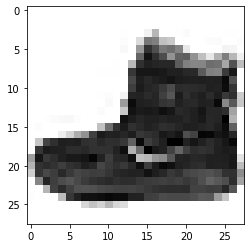

In [38]:
visluaizeImage(trainingImages[0])

<div class="alert alert-block alert-success">
The image above represents the first images in training images</div>

<div class="alert alert-block alert-info">
Lastly, lets check a sample from training label by printing the label of same image we just visualized
</div>

In [39]:
print("\033[1;34m First Training Label is: {}".format(trainingLabels[0]))

 First Training Label is: 9


<div class="alert alert-block alert-success">
We have succesfully viewed the sample of training images and training labels. We won't check sample of testing samples
as the data is similar to what we just viewed. We already know all info about what and how the data is.
</div>

<div class="alert alert-block alert-info">
We realize that the values in our data range from 0-255 and in integer(unt-8) data type. It would be better to normalize the data so that the data points range in 0-1 and change its data type to float32 since the values will no longer be in integers. This way data won't be heterogenous as well. <br>

Also, the labels currently range between 0-9. We will use one-hot encoding to preprocess them. Currently the sample that we displayed showed 9. So e.g we'll change its format in a way that to represent the 9th class it should show [0,0,0,0,0,0,0,0,0,1]. What this means is because there are 10 classes there are 10 elements present and whichever class an image belongs to  its value will turn to 1 while all other bits will be 0. In this case last 0 will be one and all bits will be 0 since class 9 is the last class because first class begins from 0 and there are are total 10 classes.z

Although deep learning can be done without these steps as well but it makes it easier and more accruacte to do it this way. We'll be doing that right now as a part or prepraring the data to be fed into the network
</div>

In [40]:
#Code take from course content starts here

#Reshaping the 3D Tensor to 2D Tensors  for training and testing images
trainingImages = trainingImages.reshape((60000, 28 * 28))
testingImages = testingImages.reshape((10000, 28 * 28))

#Changing the DataType from uint8 (Integer) and to float32 (Decimal)
trainingImages = trainingImages.astype('float32') / 255
testingImages = testingImages.astype('float32') / 255

#Categorical Encoding for training and testing labels as there are multiple classes
from tensorflow.keras.utils import to_categorical
trainingLabels = to_categorical(trainingLabels)
testingLabels = to_categorical(testingLabels)

#Code take from course content ends here

<div class="alert alert-block alert-info">
Now lets see how the data looks like by checking the shape, dimensioanlity and data type
</div>

In [41]:
#The code in below cells is originally written by me

In [42]:
#Function call to print shape, dimensionality and data type of the data
getDataInfo(trainingImages, trainingLabels, testingImages, testingLabels)

 Shapes of the data are following: 
 Training Images: (60000, 784)
 Testing Images: (10000, 784)
 Training Labels: (60000, 10)
 Testing Labels: (10000, 10)

 Dimensionality of the data are following: 
 Training Images: 2
 Testing Images: 2
 Training Labels: 2
 Testing Labels: 2

 Data types of the data are following: 
 Training Images: float32
 Testing Images: float32
 Training Labels: float32
 Testing Labels: float32


<div class="alert alert-block alert-success">
We have successfully managed to alter the dimensionality, shape and data type of our data. 

<div class="alert alert-block alert-info">
    Now lets check a sample from our data. First lets check training image values
</div>

In [43]:
print("\033[1;35m Training Images 1: {}".format(trainingImages[1]))

 Training Images 1: [0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.         0.         0.16078432 0.7372549
 0.40392157 0.21176471 0.1882353  0.16862746 0.34117648 0.65882355
 0.52156866 0.0627451  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00392157 0.         0.         0.         0.19215687
 0.53333336 0.85882354 0.84705883 0.89411765 0.9254902  1.
 1.         1.         1.         0.8509804  0.84313726 0.99607843
 0.90588236 0.627451   0.1764706  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05490196 0.6901961  0.87058824 0.8784314  0.83137256
 0.79607844 0.7764706  0.76862746 0.78431374 0.84313726 0.8
 0.7921569  0.7882353  0.7882353  0.7882353  0.81960785 0.85490197
 0.8784314  0.6431373  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.7372549
 0.85882354 0.78431374 0.7764706

<div class="alert alert-block alert-success">
 We can now see the values in training images now range between 0-1 and are decimal.
</div>

<div class="alert alert-block alert-info">
Now lets see label for this image
</div>

In [44]:
print("\033[1;34m First Training Label is: {}".format(trainingLabels[0]))

 First Training Label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [45]:
#The code originally written by me ends here

<div class="alert alert-block alert-success">
The label sample indicates that now values are either 0 or 1. In this case all elements are 0 except one that is placed 10th that means the label represents class 9 as first element represents starts from 0 instead of 1
</div> 

<div class="alert alert-block alert-success">
    We are successfuly done with data preprocessing . Next we will be looking to <b>develop</b> the <b>smallest possible model that does better than the baseline.</b>
</div>

### Developing a model that does better than a baseline

<div class="alert alert-block alert-info">
As we saw in last section that we have equal number of samples of each class in the training images. Total samples in the training data were 60,000 and their are total 10 classes. Each class had 6000 samples. So we asumme that the common sense baseline for a human would be 10%. As for a person to guess an images the probability that it is correct is 1 out of 10 options which makes it 10%. In this section our aim is to generate a model aiming for statistical power. We'll be aiming to develop a model that has an accuracy greater than the common sense baseline which is 10%. So in summary we're aiming for the smallest possible model with an accuracy greater than 10%.
    
We have a Multi-Class, Single Label Classification problem here so we need to be careful while choosing the loss function, optimizer, learning rate,and the last layer activation.
 
We have chosen the categorical_crossentropy as the loss function as it's most suitable for the problem we are trying to solve.
    
The last layer will have 10 neurons as there are 10 classes and will have a softmax activation function. Softmax Activation Function. What it does is output a probability distribution over multiple classes.
    
The optimizer we're using is the adam.
</div>

<div class="alert alert-block alert-info">

We're trying to create a model that has an accuracy greater than 10%. We'll try to develop a small model.
    
Note: We won't be following modular approach here since we are just developing a small model.
</div>

In [101]:
# Code taken and adapted from course content ends here
from tensorflow.keras import models, layers
network = models.Sequential()
network.add(layers.Dense(2, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

# train
network.fit(trainingImages, trainingLabels, epochs=5, batch_size=2)

# Code taken and adapted from course content ends here

Epoch 1/5
30000/30000 [==============================] - 146s 5ms/step - loss: 1.2443 - accuracy: 0.5163
Epoch 2/5
30000/30000 [==============================] - 153s 5ms/step - loss: 0.9532 - accuracy: 0.6453
Epoch 3/5
30000/30000 [==============================] - 152s 5ms/step - loss: 0.8123 - accuracy: 0.7118
Epoch 4/5
30000/30000 [==============================] - 152s 5ms/step - loss: 0.7610 - accuracy: 0.7281
Epoch 5/5
30000/30000 [==============================] - 152s 5ms/step - loss: 0.7462 - accuracy: 0.7305


<div class="alert alert-block alert-success">
We've succesfully developed a model that has accuracy of 0.7305 or 73.05%  and loss 0.7462 on training data. <br>

So what we have done is create a model with 2 layers. The first one is a relu acitvation laer that has 2 neurons.While the second and last layer is a softmax activation layer with 10 neurons as there are 10 classes so it seemed most suitable. I have trained the network using network.fit(.....). The network goes over 5 epochs while the batch size is 2. Batch size determines the size of the batch that will be fed into network as all the dataset is not fed at once. We chose a small batch size here which is 2. The model will iterate over each batch 5 times which is called an epoch.

So the network will perform 30,0000 gradient updates  per epoch and in total will perform 120,000 gradient updates. 
</div>

<div class="alert alert-block alert-info">
Let's evaludate our model on test data too</div>

In [102]:
test_loss, test_acc = network.evaluate(testingImages, testingLabels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7529 - accuracy: 0.7374


<div class="alert alert-block alert-success">
We've succesfully developed a model that has accuracy of 0.7374 or 73.74% and loss 0.7529 on testing data. The accuracy might not be very high still beats the baseline(0.1 or 10%) by a huge margin even though it's just a small model

But there is a thing to consider, In the first layer we give 2 neurons which is considerable very small amount of neurons and considering the fact in final layer there are 10 neurons means there are 10 dimensions. This might result in information bottleneck. This can  drop our accuracy on unseen data so in upcoming sections while we create bigger and more powerfull model and we will try to avoid this problem.
</div>

### Scaling up: developing a model that overfits 

<div class="alert alert-block alert-info">
In the last section we developd a model that was better than the baseline. We'll take that model further by scaling up things in this section. First lets also add holdout validation to our model.

We'll be following a modular approach here and so we will create a function
</div>

In [120]:
# Code taken and adapted from course content ends here

from tensorflow.keras import models, layers

def createNetwork():
    '''Creates a network based of 2 layers
    parameters: None
    Output: Returns a created network
    '''
    #network being created
    network = models.Sequential()
    network.add(layers.Dense(2, activation='relu', input_shape=(28 * 28, )))
    network.add(layers.Dense(10, activation='softmax'))
    return network

def splitValidationData(trainData, trainLabels, validationSplit):
    '''Function that separates data into validation and training on the basis of certain threshold
    Parameters: trainData: The training data, trainLabels: Training labels, validationSplit: The number of 
    samples to be splitted.
    Output: Returns 4 numpy arrays of spltted training labels and training data
    '''
    #Data Being Splitted
    x_val = trainData[:validationSplit]
    partial_x_train = trainData[validationSplit:]
    y_val = trainLabels[:validationSplit]
    partial_y_train = trainLabels[validationSplit:]
    
    return x_val, partial_x_train, y_val, partial_y_train

def deepModel(trainData, trainLabels, validationSplit = 9000):
    '''Function trains a model on the basis of training data and labels using hold-outvalidation
    Parameters: trainData: The training data, trainLabels: Training labels, validationSplit(optional): The number of 
    samples to be splitted.

    Output: Returns a history object containing different metrics of how the model performed
    '''

    network = createNetwork()
    network.compile(optimizer='adam',
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

    x_val, partial_x_train, y_val, partial_y_train = splitValidationData(trainData, trainLabels, validationSplit)

    history = network.fit(partial_x_train, 
                        partial_y_train,
                        epochs = 5,
                        batch_size = 2,
                        validation_data = (x_val, y_val))
    
    return history.history

In [121]:
#The number of samples to be separated for validation
validationSplit = 9000
#Function call to run the model
crossValModel = deepModel(trainingImages, trainingLabels, validationSplit)

Epoch 1/5
25500/25500 [==============================] - 129s 5ms/step - loss: 1.1197 - accuracy: 0.5530 - val_loss: 0.9448 - val_accuracy: 0.6238
Epoch 2/5
25500/25500 [==============================] - 130s 5ms/step - loss: 0.9367 - accuracy: 0.6153 - val_loss: 0.9077 - val_accuracy: 0.6406
Epoch 3/5
25500/25500 [==============================] - 132s 5ms/step - loss: 0.9080 - accuracy: 0.6338 - val_loss: 0.8940 - val_accuracy: 0.6508
Epoch 4/5
25500/25500 [==============================] - 135s 5ms/step - loss: 0.8889 - accuracy: 0.6457 - val_loss: 0.8802 - val_accuracy: 0.6602
Epoch 5/5
25500/25500 [==============================] - 129s 5ms/step - loss: 0.8688 - accuracy: 0.6602 - val_loss: 0.8511 - val_accuracy: 0.6890


<div class="alert alert-block alert-success">
We've successfully added hold-out validation to our network as the evaluation protocol for it 
</div>

<div class="alert alert-block alert-info">
We've added the holdout-validation but scaling up things does not mean only adding evaluation protocol.
Next we'll be making our network bigger and increase its model capacity by adding 2 more layer between the first and last layers. We'll increase the number of neurons in a layer which were currently se to 2 in the first layer. The last layer will have the same number  of neurons that is 10. We'll increase the batch size and also the number of epochs. What you'll see now is a bigger neural network than the first one.
</div>

<div class="alert alert-block alert-info">
Let's update our function to have more layers and epochs
</div>

In [110]:
# build
from tensorflow.keras import models, layers

def createNetwork():
    '''Create network based of 4 layers each with 512 neurons and last with 10 neurons.
    parameters: None
    Output: Returns a created network
    '''
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
    network.add(layers.Dense(512, activation='relu'))
    network.add(layers.Dense(512, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))
    return network

def splitValidationData(trainData, trainLabels, validationSplit):
    '''Function that separates data into validation and training on the basis of certain threshold
    Parameters: trainData: The training data, trainLabels: Training labels, validationSplit: The number of 
    samples to be splitted.
    Output: Returns 4 numpy arrays of spltted training labels and training data
    '''
    #validation
    x_val = trainData[:validationSplit]
    partial_x_train = trainData[validationSplit:]
    y_val = trainLabels[:validationSplit]
    partial_y_train = trainLabels[validationSplit:]
    
    return x_val, partial_x_train, y_val, partial_y_train

def deepModel(trainData, trainLabels, validationSplit = 9000):
    '''Function trains a model for 30 epochs on the basis of training data and labels using hold-outvalidation
    Parameters: trainData: The training data, trainLabels: Training labels, validationSplit(optional): The number of 
    samples to be splitted.

    Output: Returns a history object containing different metrics of how the model performed
    '''

    network = createNetwork()
    
    network.compile(optimizer='adam',
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

    x_val, partial_x_train, y_val, partial_y_train = splitValidationData(trainData, trainLabels, validationSplit)

    history = network.fit(partial_x_train, 
                        partial_y_train,
                        epochs = 30,
                        batch_size = 512,
                        validation_data = (x_val, y_val))# evaluate on the test set
    
    return history.history

In [112]:
#The number of samples to be separated for validation
validationSplit = 9000
#Function call to train and validate the network
biggerModel = deepModel(trainingImages, trainingLabels, validationSplit)

Epoch 1/30
100/100 [==============================] - 44s 439ms/step - loss: 0.5908 - accuracy: 0.7954 - val_loss: 0.4100 - val_accuracy: 0.8490
Epoch 2/30
100/100 [==============================] - 40s 397ms/step - loss: 0.3905 - accuracy: 0.8602 - val_loss: 0.3587 - val_accuracy: 0.8711
Epoch 3/30
100/100 [==============================] - 33s 333ms/step - loss: 0.3377 - accuracy: 0.8765 - val_loss: 0.3295 - val_accuracy: 0.8840
Epoch 4/30
100/100 [==============================] - 32s 315ms/step - loss: 0.3113 - accuracy: 0.8844 - val_loss: 0.3516 - val_accuracy: 0.8741
Epoch 5/30
100/100 [==============================] - 31s 312ms/step - loss: 0.2867 - accuracy: 0.8929 - val_loss: 0.3085 - val_accuracy: 0.8888
Epoch 6/30
100/100 [==============================] - 32s 316ms/step - loss: 0.2652 - accuracy: 0.9010 - val_loss: 0.3005 - val_accuracy: 0.8896
Epoch 7/30
100/100 [==============================] - 31s 309ms/step - loss: 0.2540 - accuracy: 0.9040 - val_loss: 0.3065 - val_ac

<div class="alert alert-block alert-success">
It took quite long to train the network this time as there were 100 epochs. 
    
Let's get a summary of our neural network. 
It has 4 layers. The last one is a softmax activation layer with three neuron while the first 3 have 512 neurons and are relu activation layer. Input shape is passed in the first layer but not in upcoming layer is neural network is smart enough to make it in the shape that was the outcome of the last layer.
    
The network uses Hold-Out Validation as evaluaation protocol. It has a batch size of 512 to and has 100 epochs that means it loops over the dataset for 100 iterations. 
    
The optimizer we use is adam with default learning rate, loss function is categorical_crossentropy. We use accuracy as the measure of success.
</div>

<div class="alert alert-block alert-info">
Now lets visualize two graphs. One will be used to see how the values of training loss and the validation loss go over 100 epochs. The second graph will show values of training accuracy and validation accuracy over 30 epochs. 
    
This will help us to see is there overfitting in our network? If there is from which epoch does it begin.
    
Overfitting happens when model performs good on training data but it struggles with the unseens data. In our case if there is overfitting, the validation accuracy will be less than training accuracy. While training loss will be less than validation loss
</div>

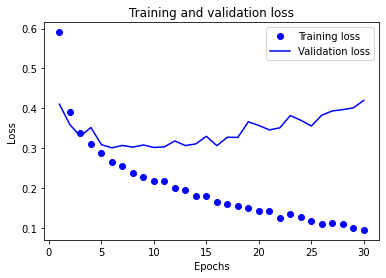

In [114]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
loss = biggerModel['loss']
val_loss = biggerModel['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


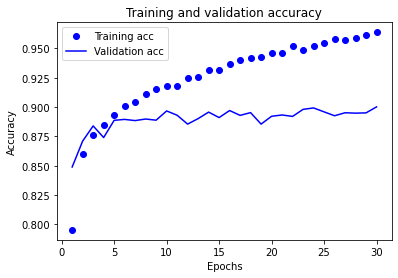

In [115]:
plt.clf()

#Plotting the training and validation accuracy
acc = biggerModel['accuracy']
val_acc = biggerModel['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


<div class="alert alert-block alert-success">
Graph 1 Analysis: The graphs shows training loss to decrease constantly and nearing 0 after 30 epochs. While validation loss start to decerase in the start, around 6th epoch it changes its direction and overftting begins.
    
Graph 2 Analysis: The graphs shows training accuracy to increase constantly and nearing 1 after 30 epochs. While validation accuracy starts to increase in the start, around 6-7 epoch it stops increase stays steady.
    
You might see be wondering why does the difference between validation loss and training loss, validation accuracy and training accuracy continues to increase after 6-7 epochs. This is due to overfitting. The is a problem where model start to perform extrememly accurtely on training data but worsely performs on unseen data.The model has somewhat started to memorize the training data, and it has started to go frm generalization. Which means it will not be able to perform on the data it has not seen before. 
    
Our aim is to create a model that performs well on unseen data as well and for that we need to eliminate or reduce overfitting. And this is what we'll be doing in the next section

</div>
    

### Regularizing your model and tuning your hyperparameters

<div class="alert alert-block alert-info">
In the last section through visualizations we noticed our model begins to overfit after 6 epochs. What this means is the performance of the model continues to increase on the training data, but starts to decrease on unseen data. So what happens is our model goes far away from generalization and instead memorizes the training data and its labels. So in this section we will be trying to reduce or eliminate overfitting to make our model's performance better on unseen data. We will be using different tehniques on the model through certain steps 1 by 1 to avoid or reduce the overfitting problem. <br><br>
1. Reducing the Network's Capacity.<br>
2. Adding Weight Reduarization (Regularization)<br>
3. Adding Dropout (Regularization)<br>
4. Different Learning Rates<br>
5.Early stopping<br>

We'll be following a modular approach here as well. In last section we created a function to train and validate our model. In this section we will update the function to take in more parameters and update the function accordingly according to the enviorment. We will also be creating a function for our visualizations here to compare how our model performed through different techniques.
</div>

<div class="alert alert-block alert-info">
    <h4> 1. Reducing the network's size.  </h4>
<p>
We'll be passing diffferent number of neurons to our network in order to
find out which number of neurons reduces the overfitting problem. We already tried the model with 512 neurons in each layer except the last one which has 10 as their are 10 classes. Now what we will do is train our model using smaller number of neurons 128 and 256 as well. Later on we'll go through visualzations to find out which is the best model capacity for us.</p>
</div>

<div class="alert alert-block alert-info">
First lets create function for our model
</div>

In [24]:
# Code taken and adapted from course content start here
from tensorflow.keras import models, layers, regularizers

def createNetwork(neuronsInLayer, l2Rate, dropOutRate):
    '''Create network based of 4 layers each with neurons number accoring to parameter and last layer with 10 neurons.
    Also applies l2 reguularization and dropout
    parameters: None
    Output: Returns a created network
    '''
    network = models.Sequential()
    network.add(layers.Dense(neuronsInLayer, kernel_regularizer=regularizers.l2(l2Rate), 
                             activation='relu', input_shape=(28 * 28, )))
    network.add(layers.Dropout(dropOutRate))
    network.add(layers.Dense(neuronsInLayer, kernel_regularizer=regularizers.l2(l2Rate), activation='relu'))
    network.add(layers.Dropout(dropOutRate))
    network.add(layers.Dense(neuronsInLayer, kernel_regularizer=regularizers.l2(l2Rate), activation='relu'))
    network.add(layers.Dropout(dropOutRate))
    network.add(layers.Dense(10, activation='softmax'))
    return network

def splitValidationData(trainData, trainLabels, validationSplit):
    '''Function that separates data into validation and training on the basis of certain threshold
    Parameters: trainData: The training data, trainLabels: Training labels, validationSplit: The number of 
    samples to be splitted.
    Output: Returns 4 numpy arrays of spltted training labels and training data
    '''
    #validation
    x_val = trainData[:validationSplit]
    partial_x_train = trainData[validationSplit:]
    y_val = trainLabels[:validationSplit]
    partial_y_train = trainLabels[validationSplit:]
    
    return x_val, partial_x_train, y_val, partial_y_train

def deepModel(trainData, trainLabels, validationSplit = 9000, neuronsInLayer = 512, l2Rate = 0, dropOutRate = 0 ):
    '''Function trains a model for 30 epochs on the basis of training data and labels, uses l2 rate and dropout 
    to avoid overfitting. also can have different network capacity based on parameters
    Parameters: trainData: The training data, trainLabels: Training labels, validationSplit(optional): The number of 
    samples to be splitted, neuronsInLayer: No. of neurons in each layer except last, l2Rate: l2 rate to be applied,
    dropOutRate: drop out to be apploed

    Output: Returns a history object containing different metrics of how the model performed
    '''  

    network = createNetwork(neuronsInLayer, l2Rate, dropOutRate)
    
    network.compile(optimizer='adam',
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

    x_val, partial_x_train, y_val, partial_y_train = splitValidationData(trainData, trainLabels, validationSplit)

    history = network.fit(partial_x_train, 
                        partial_y_train,
                        epochs = 30,
                        batch_size = 512,
                        validation_data = (x_val, y_val))# evaluate on the test set
    
    return history.history

# Code taken and adapted from course content ends here

<div class="alert alert-block alert-info">
Now we will call the function three times. Each time we'll use different number of neurons. The function returns a dictionary object which contains info about how model performed with specific number of neurons. The dictionary object will be appended to an array. This way we will have 3 model enteries in the array . Each entry containing the info of how the model performed. We will use this to visualize their performance in next step.
</div>

In [22]:
# my own code
#list containing different number of neurons
neuronsInLayer = [128,256, 512]
#L2 regularizatin rate
l2Rate = 0
# drop out rate
dropOutRate = 0
#number of samples for validation
validationSplit = 9000

layerSizeCheckModel = []

#loop over and run model with different number of neurons
for i in neuronsInLayer:
    eachModel = deepModel(trainingImages, trainingLabels, validationSplit, i, l2Rate, dropOutRate)
    layerSizeCheckModel.append(eachModel)
    
#my own code ends here

Epoch 1/30
100/100 [==============================] - 16s 164ms/step - loss: 0.7253 - accuracy: 0.7482 - val_loss: 0.4842 - val_accuracy: 0.8271
Epoch 2/30
100/100 [==============================] - 15s 151ms/step - loss: 0.4374 - accuracy: 0.8445 - val_loss: 0.4166 - val_accuracy: 0.8509
Epoch 3/30
100/100 [==============================] - 13s 130ms/step - loss: 0.3861 - accuracy: 0.8616 - val_loss: 0.3816 - val_accuracy: 0.8638
Epoch 4/30
100/100 [==============================] - 13s 131ms/step - loss: 0.3618 - accuracy: 0.8710 - val_loss: 0.3731 - val_accuracy: 0.8641
Epoch 5/30
100/100 [==============================] - 13s 131ms/step - loss: 0.3356 - accuracy: 0.8798 - val_loss: 0.3467 - val_accuracy: 0.8763
Epoch 6/30
100/100 [==============================] - 15s 147ms/step - loss: 0.3245 - accuracy: 0.8815 - val_loss: 0.3349 - val_accuracy: 0.8769
Epoch 7/30
100/100 [==============================] - 16s 162ms/step - loss: 0.3100 - accuracy: 0.8868 - val_loss: 0.3537 - val_ac

<div class="alert alert-block alert-info">
Now let visualize but first lets create a function for visualizaions
    </div>

In [26]:
#my own code starts from here
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


def getVisuals(history, titles):
    '''Function display 6 visualization in 2 * 3 format. 3 for validation loss of each model and 3 for validation 
    accuracy of each model.
    
    Parameters: history: Contains different models, titles: contains title for each. graph
    
    Output: displays graphs for 3 models validatio loss and validation accuracy in 2 * 3 format.
    '''

    #Create a grid with 2 x 3 Grid for subplots
    fig, ax = plt.subplots(2,3,figsize=(21,12))


    val_loss1 = history[0]['val_loss']
    val_loss2 = history[1]['val_loss']
    val_loss3 = history[2]['val_loss']

    #Create the line plot
    ax[0,0].plot(val_loss1, color = 'blue', lw = 1.2, label='Smaller Network', alpha = 0.8)
    #Create second plot on same figure
    ax[0,1].plot(val_loss2, color = 'red', lw = 1.2, label='Medium Network', alpha = 0.8)
    #create third plot on same figure
    ax[0,2].plot(val_loss3, color = 'green', lw = 1.2, label='Bigger Network', alpha = 0.8)
    
    # set titles for plots
    ax[0,0].set_title(titles[0])
    ax[0,1].set_title(titles[1])
    ax[0,2].set_title(titles[2])
    
    #Set minor ticks on x-axis for each plot
    for i in range(2):
        for j in range(3):
            ax[i,j].grid(True)
            ax[i,j].xaxis.set_minor_locator(MultipleLocator(1))




    val_accuracy1 = history[0]['val_accuracy']
    val_accuracy2 = history[1]['val_accuracy']
    val_accuracy3 = history[2]['val_accuracy']

    #Create the line plot
    ax[1,0].plot(val_accuracy1, color = 'blue', lw = 1.2, label='Smaller Network', alpha = 0.8)
    #Create second plot on same figure
    ax[1,1].plot(val_accuracy2, color = 'red', lw = 1.2, label='Medium Network', alpha = 0.8)
    #create thurd plot on same figure
    ax[1,2].plot(val_accuracy3, color = 'green', lw = 1.2, label='Bigger Network', alpha = 0.8)
    
    #sset title sofr plots
    ax[1,0].set_title(titles[3])
    ax[1,1].set_title(titles[4])
    ax[1,2].set_title(titles[5])

#my own code ends here        

<div class="alert alert-block alert-info">
Now lets call the function to display each models performance through graph of each models validation loss and validation accuracy
</div>

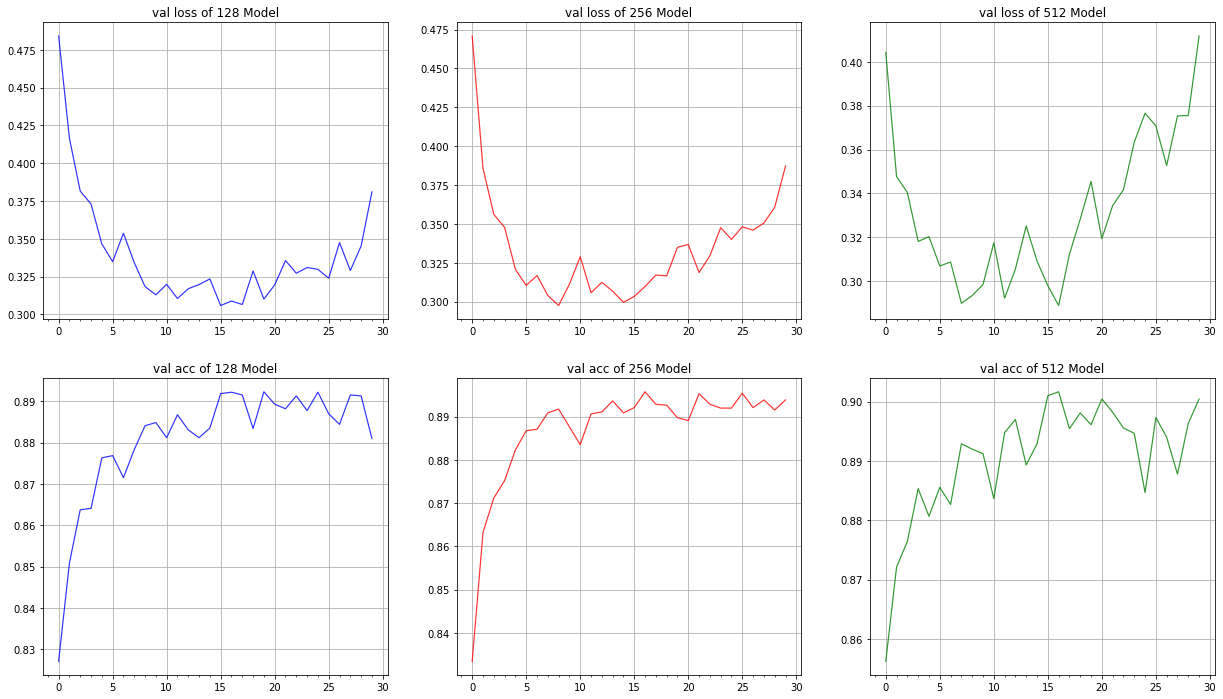

In [62]:
#my own code start here
#list of different titles for graphs
layerSizetitles = ['val loss of 128 Model', 'val loss of 256 Model', 'val loss of 512 Model',
                   'val acc of 128 Model', 'val acc of 256 Model', 'val acc of 512 Model']
#function call to display the graphs
getVisuals(layerSizeCheckModel, layerSizetitles)
#my own code ends here

<div class="alert alert-block alert-success">
First let's see the validation loss of 128 Capacity Model. It shows signs of overfitting around 11th epoch when it start to go up but it changes direction again and reaches the minimum loss around 17th epoch. The 256 Model Reaches its minumum point on 8th epoch and then starts to overfit. The 512 Model reaches it minimum point in validation loss in 6-7th epoch. It goes up again and then comes down to. almost same minimum point in 16th epoch but starts to overfit. The graph of validation loss for 512 Model shows the most noise. It's more volatile.

Notice: 512 model have different scalling here than the one in last sections

The validation accuracy for 128 Model overfits after 17th epoch, the validation accuracy reaches it's peak in 16th epoch and then stays starts to overfit. In 512 Model the validation accuracy is highest at 16th-17th epcoch but again it is much noisier. 

So according to the above graph and the conclusions from these graphs the best model to continue from here is the 128 Model as starts later or almost equal to other models, but it is less noisier and as number of neurons are less it will take less computational power. Next we will try to mitgiate overfitting use Weighted L2 regularization.
    </div

<div class="alert alert-block alert-info">
<h4> 4.Adding Weighted L2 regularitzatio by using best network size we just obtained </h4>
<p>So in the last section we selected the best network capacity for our model which was 128 neurons. Now we will compare our original model which has no L2 regularization with 2 other model with different L2 regularizations rate 0.0001 and 0.001. We repreat the samr pocedure again except this time instead of passing different neurons we will be passing different l2 Rate.

Note: L2 rate 0 means no l2 regularization will be done.</p>
</div>

In [25]:
#my own code start here
#number of neurons in each layer
neuronsInLayer = 128
#list of different l2 rates
l2Rate = [0, 0.0001, 0.001]
eachModel = 0
#drop out rate
dropOutRate = 0
#samples to be separated for validation
validationSplit = 9000
l2CheckModel = []

#run the model with different l2 rates
for i in l2Rate:
    eachModel = deepModel(trainingImages, trainingLabels, validationSplit, neuronsInLayer, i, dropOutRate)
    l2CheckModel.append(eachModel)
    
#my own code ends here

Epoch 1/30
100/100 [==============================] - 13s 134ms/step - loss: 0.7075 - accuracy: 0.7639 - val_loss: 0.4626 - val_accuracy: 0.8387
Epoch 2/30
100/100 [==============================] - 13s 132ms/step - loss: 0.4420 - accuracy: 0.8428 - val_loss: 0.4270 - val_accuracy: 0.8484
Epoch 3/30
100/100 [==============================] - 13s 132ms/step - loss: 0.3980 - accuracy: 0.8573 - val_loss: 0.4231 - val_accuracy: 0.8503
Epoch 4/30
100/100 [==============================] - 13s 130ms/step - loss: 0.3604 - accuracy: 0.8703 - val_loss: 0.3647 - val_accuracy: 0.8677
Epoch 5/30
100/100 [==============================] - 14s 138ms/step - loss: 0.3441 - accuracy: 0.8750 - val_loss: 0.3527 - val_accuracy: 0.8733
Epoch 6/30
100/100 [==============================] - 13s 128ms/step - loss: 0.3200 - accuracy: 0.8830 - val_loss: 0.3422 - val_accuracy: 0.8762
Epoch 7/30
100/100 [==============================] - 14s 138ms/step - loss: 0.3097 - accuracy: 0.8864 - val_loss: 0.3333 - val_ac

<div class="alert alert-block alert-info">
Now lets get graphs of how our models performed.
    </div>

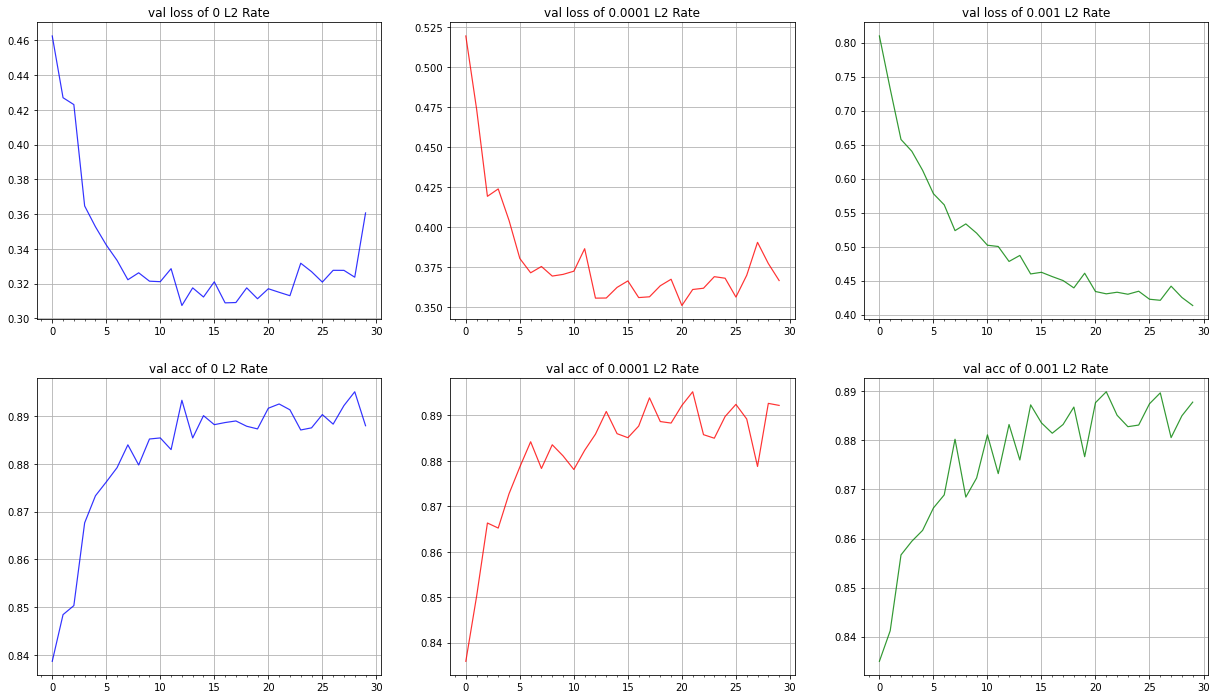

In [27]:
#my own code starts here
#lists for titles of graphs
l2RateTitles = ['val loss of 0 L2 Rate', 'val loss of 0.0001 L2 Rate', 'val loss of 0.001 L2 Rate',
                   'val acc of 0 L2 Rate', 'val acc of 0.0001 L2 Rate', 'val acc of 0.001 L2 Rate']
#function call to show visualizations
getVisuals(l2CheckModel, l2RateTitles)
#my own code ends here

<div class="alert alert-block alert-success">
<b>Validation loss:</b> The model with 0.0001 L2 Rate overfits after 20th epoch if we see the validation loss graph. It has lowest validation loss around 0.350. Model with 0 L2 rate has lowest validation loss rate around 0.31 and over fits after 11th-12th epoch. Model with  0.001 L2 Rate shows no signs of oveerfitting but it's lowest accuracyis hugh around 0.42. 
    
<b>Validation accuracy: </b>The model with 0.0001 L2 Rate stays steady after continuously increaseing till 12th epoch. It later on eventually overfits. Model with 0 L2 rate has validation accuracy rate around 22nd epoch. Model with  0.001 L2 Rate shows no less signs of over fitting.
    
So we decided to chose l2Rate 0.0001 as it although limitedly but still reduces overfitting, that is the reason it is chosen over original 0 l2 rate model. The reason we did not chose l2 rate 0.001 model because it althugh performed good with overfitting but there was too much compromise with loss as it had a high minumium loss.
</div>

<div class="alert alert-block alert-info">
<h4> Adding Drop Out </h4>
<p>In this section we are going to apply another regularization technique called dropout. So in the last section we selected the L2 Regularization for our model with 0.0001. Now we will compare our original model which has no Drop Out regularization with 2 other models with different Drop Out Rates rate 0.2 and 0.5. We repreat the same pocedure again except this time we'll be passing different dropout rates.

Note: Drop Out rate 0 means no Drop Out will be done.</p></div>

In [28]:
#my own coed starts here
#neurons in each layer
neuronsInLayer = 128
#L2 Regularization in each layer
l2Rate = 0.0001
eachModel = 0
#list of different drop out rates
dropOutRate = [0,0.2,0.5]
#samples separated for validation
validationSplit = 9000
dropRateCheckModel = []

#loop over dropOutRate and call fucntion that has model for different drop out rates
for i in dropOutRate:
    eachModel = deepModel(trainingImages, trainingLabels, validationSplit, neuronsInLayer, l2Rate, i)
    dropRateCheckModel.append(eachModel)
    
# my own code ends here

Epoch 1/30
100/100 [==============================] - 14s 141ms/step - loss: 0.7810 - accuracy: 0.7483 - val_loss: 0.5259 - val_accuracy: 0.8307
Epoch 2/30
100/100 [==============================] - 13s 130ms/step - loss: 0.4924 - accuracy: 0.8421 - val_loss: 0.4804 - val_accuracy: 0.8428
Epoch 3/30
100/100 [==============================] - 12s 125ms/step - loss: 0.4416 - accuracy: 0.8581 - val_loss: 0.4333 - val_accuracy: 0.8634
Epoch 4/30
100/100 [==============================] - 12s 123ms/step - loss: 0.4106 - accuracy: 0.8664 - val_loss: 0.4150 - val_accuracy: 0.8627
Epoch 5/30
100/100 [==============================] - 12s 119ms/step - loss: 0.3894 - accuracy: 0.8755 - val_loss: 0.3868 - val_accuracy: 0.8734
Epoch 6/30
100/100 [==============================] - 12s 117ms/step - loss: 0.3716 - accuracy: 0.8803 - val_loss: 0.3892 - val_accuracy: 0.8730
Epoch 7/30
100/100 [==============================] - 12s 118ms/step - loss: 0.3588 - accuracy: 0.8858 - val_loss: 0.3912 - val_ac

<div class="alert alert-block alert-info">
Now let's check the viusalizations
</div>

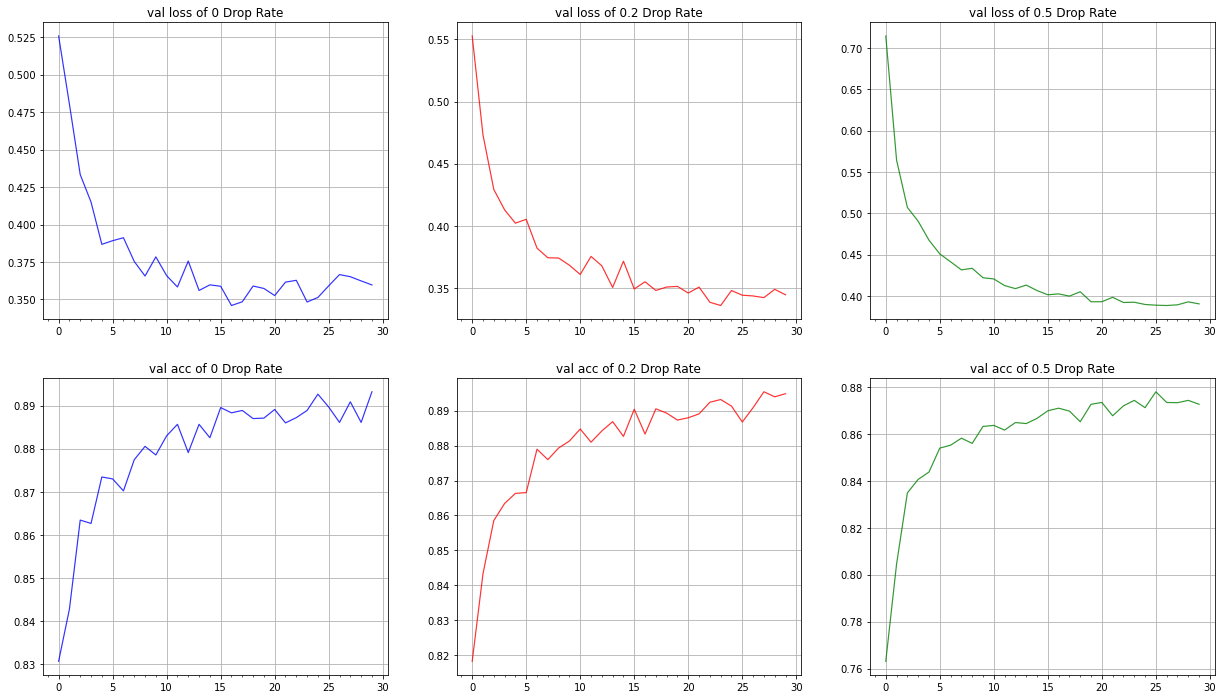

In [29]:
#my own code starts here
dropRateTitles = ['val loss of 0 Drop Rate', 'val loss of 0.2 Drop Rate', 'val loss of 0.5 Drop Rate',
                   'val acc of 0 Drop Rate', 'val acc of 0.2 Drop Rate', 'val acc of 0.5 Drop Rate']
getVisuals(dropRateCheckModel, dropRateTitles)
#my own code ends here

<div class="alert alert-block alert-success">
    <b>Validation Loss: </b>The overfitting is more reduced by applying different dropout rates but again applying more drop out rate 0.5 compromises the loss function as it goes higher to arround minimum loss around 0.38-0.39. In drop out rate 0.2 graph the minimum loss isaround 0.34. The model with 0 dropout rate has around 0.35 as lowest validation loss. The model with drop out rate has much less noise compare to other models as you can see the plot is much more smoother although the minimum validation loss is high compared to other models but it's not very high.
    <br><br><b>Validation Accuracy: </b>Again the model with 0.5 drop out rate has much less noise and the highest accuracy is almost the same
    
So accrding to the analysis we've chosen 0.5 as drop out rate as it shows the least sign of overfitting, has much less nosie, although has higher minimum loss but not very significantly high
</div>

<div class="alert alert-block alert-info">
<h4> Trying Different Learning Rates </h4>
<p>We selected best drop out rate  of our model in last sub-section. Now we'll look for the best learning rate. So we've used adam optimizer since the start and we have given no value for learning rate, as no value is given it uses 0.0001 default learning rate. In the quest of furhter improving the model we will now apply 2 more learning rate 0.01 and 0.1 and compare it with original 0.001. We'll select the best learning rate and this will be our final step for this section.
    
We'll have to update our function so besides other parameters it takes in another parameter for different learning rates. Let's do it first</p></div>

In [30]:
#my own code starts here
from tensorflow.keras import models, layers, regularizers, optimizers

def createNetwork(neuronsInLayer, l2Rate, dropOutRate):
    '''Create network based of 4 layers each with neurons number accoring to parameter and last layer with 10 neurons.
    Also applies l2 reguularization and dropout
    parameters: None
    Output: Returns a created network
    '''    
    network = models.Sequential()
    network.add(layers.Dense(neuronsInLayer, kernel_regularizer=regularizers.l2(l2Rate), 
                             activation='relu', input_shape=(28 * 28, )))
    network.add(layers.Dropout(dropOutRate))
    network.add(layers.Dense(neuronsInLayer, kernel_regularizer=regularizers.l2(l2Rate), activation='relu'))
    network.add(layers.Dropout(dropOutRate))
    network.add(layers.Dense(neuronsInLayer, kernel_regularizer=regularizers.l2(l2Rate), activation='relu'))
    network.add(layers.Dropout(dropOutRate))
    network.add(layers.Dense(10, activation='softmax'))
    return network

def splitValidationData(trainData, trainLabels, validationSplit):
    '''Function that separates data into validation and training on the basis of certain threshold
    Parameters: trainData: The training data, trainLabels: Training labels, validationSplit: The number of 
    samples to be splitted.
    Output: Returns 4 numpy arrays of spltted training labels and training data
    '''
    #validation
    x_val = trainData[:validationSplit]
    partial_x_train = trainData[validationSplit:]
    y_val = trainLabels[:validationSplit]
    partial_y_train = trainLabels[validationSplit:]
    
    return x_val, partial_x_train, y_val, partial_y_train

def deepModel(trainData, trainLabels, validationSplit = 9000, neuronsInLayer = 512, l2Rate = 0, dropOutRate = 0, 
              learningRate = 0.001):
    '''Function trains a model for 30 epochs on the basis of training data and labels, uses l2 rate and dropout 
    to avoid overfitting. also can have different network capacity and learning rates based on parameters
    Parameters: trainData: The training data, trainLabels: Training labels, validationSplit(optional): The number of 
    samples to be splitted, neuronsInLayer: No. of neurons in each layer except last, l2Rate: l2 rate to be applied,
    dropOutRate: drop out to be applied, learning rate: learning rate of the optimizer to be applied

    Output: Returns a history object containing different metrics of how the model performed
    '''    

    network = createNetwork(neuronsInLayer, l2Rate, dropOutRate)
    
    optimizer = optimizers.Adam(learning_rate=learningRate)
    network.compile(optimizer=optimizer,
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

    x_val, partial_x_train, y_val, partial_y_train = splitValidationData(trainData, trainLabels, validationSplit)

    history = network.fit(partial_x_train, 
                        partial_y_train,
                        epochs = 30,
                        batch_size = 512,
                        validation_data = (x_val, y_val))# evaluate on the test set
    
    return history.history

#my own code ends here

<div class="alert alert-block alert-info">
Now let's call the function with different learning rates</div>

In [31]:
#my own code starts here
#number of neurons in each layer
neuronsInLayer = 128
#L@ regularization rate 
l2Rate = 0.0001
eachModel = 0
#Drop out rate
dropOutRate = 0.5
#Sample separated for validation
validationSplit = 9000
#Different learning rates for optimizer
learningRates = [0.001, 0.01, 0.1]
#0.001 is default learn rate
learnRateCheckModel = []

#Loop over learningRates list and call function for different learning rates
for i in learningRates:
    eachModel = deepModel(trainingImages, trainingLabels, validationSplit, neuronsInLayer, l2Rate, dropOutRate, i)
    learnRateCheckModel.append(eachModel)
        
my own code ends here

Epoch 1/30
100/100 [==============================] - 14s 137ms/step - loss: 1.4527 - accuracy: 0.4727 - val_loss: 0.7356 - val_accuracy: 0.7493
Epoch 2/30
100/100 [==============================] - 13s 133ms/step - loss: 0.8129 - accuracy: 0.7183 - val_loss: 0.5642 - val_accuracy: 0.8100
Epoch 3/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6806 - accuracy: 0.7764 - val_loss: 0.5128 - val_accuracy: 0.8319
Epoch 4/30
100/100 [==============================] - 13s 125ms/step - loss: 0.6255 - accuracy: 0.7976 - val_loss: 0.4756 - val_accuracy: 0.8414
Epoch 5/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5862 - accuracy: 0.8121 - val_loss: 0.4626 - val_accuracy: 0.8481
Epoch 6/30
100/100 [==============================] - 13s 126ms/step - loss: 0.5640 - accuracy: 0.8190 - val_loss: 0.4502 - val_accuracy: 0.8492
Epoch 7/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5508 - accuracy: 0.8274 - val_loss: 0.4382 - val_ac

<div class="alert alert-block alert-info">
Now let's check the viusalizations
</div>

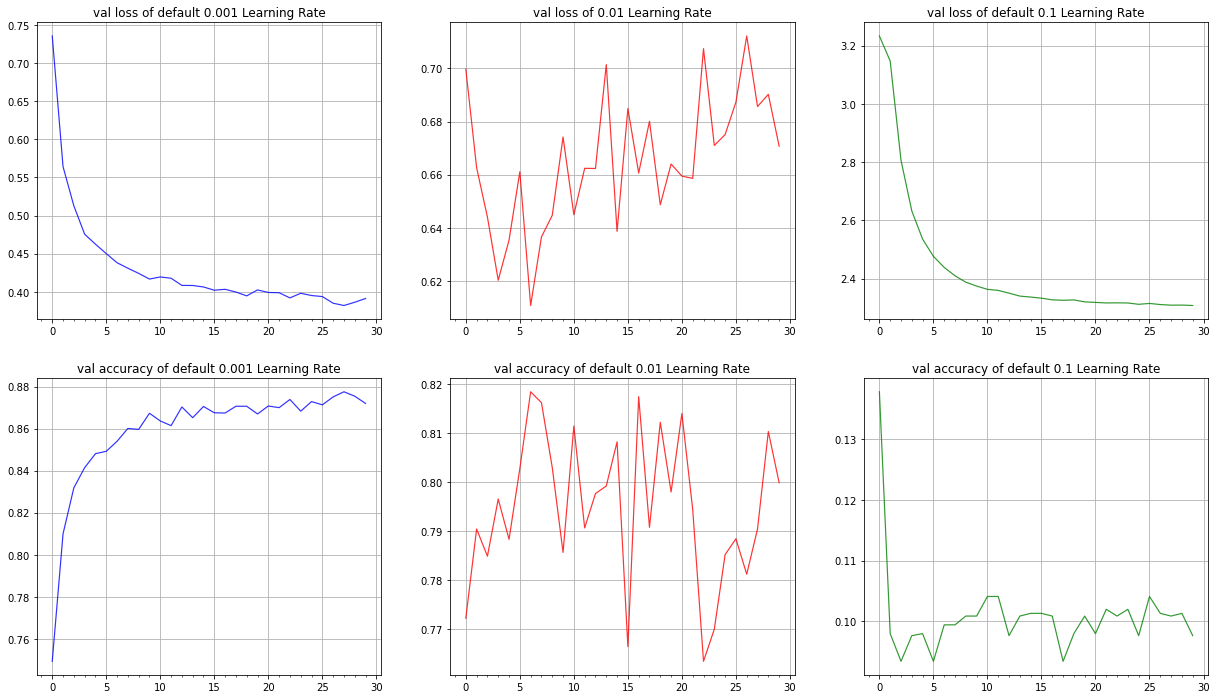

In [32]:
#my own code starts here
#List containig titles of each graphs
learnRateTitles = ['val loss of default 0.001 Learning Rate', 'val loss of 0.01 Learning Rate', 
                  'val loss of default 0.1 Learning Rate',
                   'val accuracy of default 0.001 Learning Rate', 'val accuracy of default 0.01 Learning Rate',
                 'val accuracy of default 0.1 Learning Rate']
#function call to show visualizations
getVisuals(learnRateCheckModel, learnRateTitles)
#my own code ends here

<div class="alert alert-block alert-success">
<b>Validation loss: </b> The model with 0.01 learning rate has very volatile plot and so much noise in data and overfit almost immediately. Model with 0.1 learning rate shows no signs of overfitting but the validation loss is very high as minimum loss is around 2.2. The best case here is our original model with 0.001 learning rate it shows little over fitting that too very late and has low minimum validation loss.

<b>Validation Accuracy: </b> Again the model with 0.01 learning rate is very noise and overfits imeediately. The model with 0.1 overfits from start with accuracy decrease from the start. The best model again is the orginal model with 0.001 default learning rate as it has less no, Less overfitting.
    
So we've chosen to go with our orgininal learning rate 0.001
</div>

### Early Stopping at 27 epochs

<div class="alert alert-block alert-info">
As you can see we've applied many techniques to overcome overfitting and we've succeeded in it. But as we notce our model start to show overfitting or signs of overfitting after 27th epoch. So now we'll be applying the Early Stopping technqiue to train the model till the number of epochs overfitting does not start. In our case we will not train our model till the 27th Epoch as overfitting begins from there    
</div>

<div class="alert alert-block alert-success">
We're done with this section now and in the next section we'll create a model from scratch. We've acquired the best options and hypermpaprameters that in this section, so we'll use it in that model and after training we will evaluate our model's performance on the testing data.

## Final Model

<div class="alert alert-block alert-info">
In this section we will create a model from scratch and evaluate on the test data. So in this final model we will use 3 relu activated 128 number of neurons dense layer and last 10 neuron softmax activated dense layer. Every alternate layer will be a dropout layer with dropout rate of 0.5 except for the last layer. We'll be using L2 regularization for relu activated layers with l2 rate of 0.0001. We use 0.001 learning rate for our 'Adam' optimizer. We use accuracy as measure of success and categorical_crossentropy as loss function. Our bathc size is 512 and we'll train the model for 27 epochs.
</div>

<div class="alert alert-block alert-info">
Now let's create a final model
</div>

In [35]:
#my own code starts here
from tensorflow.keras import models, layers, regularizers, optimizers

def createNetwork(neuronsInLayer, l2Rate, dropOutRate):
    '''Create network based of 4 layers each with neurons number accoring to parameter and last layer with 10 neurons.
    Also applies l2 reguularization and dropout
    parameters: None
    Output: Returns a created network
    '''    
    network = models.Sequential()
    network.add(layers.Dense(neuronsInLayer, kernel_regularizer=regularizers.l2(l2Rate), 
                             activation='relu', input_shape=(28 * 28, )))
    network.add(layers.Dropout(dropOutRate))
    network.add(layers.Dense(neuronsInLayer, kernel_regularizer=regularizers.l2(l2Rate), activation='relu'))
    network.add(layers.Dropout(dropOutRate))
    network.add(layers.Dense(neuronsInLayer, kernel_regularizer=regularizers.l2(l2Rate), activation='relu'))
    network.add(layers.Dropout(dropOutRate))
    network.add(layers.Dense(10, activation='softmax'))
    return network

def FinalDeepModel(trainData, trainLabels, testData, testLabels, neuronsInLayer = 128, l2Rate = 0.01,
                   dropOutRate = 0.5, learningRate = 0.001):
    
    '''Function trains a model for 27 epochs on the basis of training data and labels, uses l2 rate and dropout 
    to avoid overfitting. also can have different network capacity and learning rates based on parameters
    Parameters: trainData: The training data, trainLabels: Training labels, neuronsInLayer: No. of neurons in each layer except last, l2Rate: l2 rate to be applied,
    dropOutRate: drop out to be applied, learning rate: learning rate of the optimizer to be applied, testData and
    train data: the parameters that have data which will be used to check how model performed

    Output: Returns list with accuracy and loss of how the model performed on test data
    '''        

    network = createNetwork2(neuronsInLayer, l2Rate, dropOutRate)
    
    optimizer = optimizers.Adam(learning_rate=learningRate)
    network.compile(optimizer=optimizer,
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])


    network.fit(trainData, trainLabels,
                        epochs = 27,
                        batch_size = 512)
    
    results = network.evaluate(testData, testLabels)
    
    return results
#my own code ends here

<div class="alert alert-block alert-success">
Let's run and evaluate the model</div>

In [36]:
#my own code starts here

#number of neurons in each layer
neuronsInLayer = 128
#L2 regularization Rate
l2Rate = 0.0001
#drop out rate
dropOutRate = 0.5
#learning rate for optimizer
learnRate = 0.001

#function call
modelResults = FinalDeepModel(trainingImages, trainingLabels,  testingImages, testingLabels, neuronsInLayer, l2Rate, 
                         dropOutRate, learnRate)

#my own code ends here

Epoch 1/27
118/118 [==============================] - 15s 124ms/step - loss: 1.3436 - accuracy: 0.5264
Epoch 2/27
118/118 [==============================] - 14s 116ms/step - loss: 0.7628 - accuracy: 0.7412
Epoch 3/27
118/118 [==============================] - 13s 114ms/step - loss: 0.6609 - accuracy: 0.7876
Epoch 4/27
118/118 [==============================] - 15s 126ms/step - loss: 0.6044 - accuracy: 0.8080
Epoch 5/27
118/118 [==============================] - 14s 118ms/step - loss: 0.5690 - accuracy: 0.8186
Epoch 6/27
118/118 [==============================] - 14s 120ms/step - loss: 0.5544 - accuracy: 0.8232
Epoch 7/27
118/118 [==============================] - 14s 121ms/step - loss: 0.5376 - accuracy: 0.8285
Epoch 8/27
118/118 [==============================] - 13s 114ms/step - loss: 0.5282 - accuracy: 0.8358
Epoch 9/27
118/118 [==============================] - 13s 114ms/step - loss: 0.5089 - accuracy: 0.8387
Epoch 10/27
118/118 [==============================] - 13s 114ms/step - l

<div class="alert alert-block alert-info">
lets check the reuslts</div>

In [37]:
modelResults

[0.40758028626441956, 0.8720999956130981]

<div class="alert alert-block alert-info">
lets present the results in a more readable way.
</div>

In [40]:
#my own code starts here
print("\033[1;34m\n The model accuracy on testing Images is: {:.3f} or {:.1f}%".format(modelResults[1],
                                                                                      modelResults[1] * 100)) 

print("\033[1;34m\n The model loss on testing Images is: {:.3f}".format(modelResults[0])) 

#my own code ends here


 The model accuracy on testing Images is: 0.872 or 87.2%

 The model loss on testing Images is: 0.408


<div class="alert alert-block alert-success">
    <b>Conclusion:</b>
<p>So our model receives an accuracy of 87.2 % on the testing image and testing labels. Which is considerbaly high and resonably good and serves our purpose right. Th eaccuracy which we received when we created the first smallest model model was 73. So we've been able to create a great model withour overfitting.</p>
    
The loss function the first model was 78 on testing data and we've achieved to take it down to 0.408 which is pretty great. The loss function is also considerable good and serves the purpose rightly. 
    
So overall we've been able to create a model the performs good on training and testing data that means it is optimized for generalization. It will be able to perform on unseen data as it peerforms on training data and that is what our aim was.
</div>